___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
<center>*Copyright Pierian Data 2017*</center>
<center>*For more information, visit us at www.pieriandata.com*</center>

# Introduction to Statsmodels

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org.

The reason we will cover it for use in this course, is that you may find it very useful later on when discussing time series data (typical of quantitative financial analysis).

Let's walk through a very simple example of using statsmodels!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# You can safely ignore the warning:
#  Please use the pandas.tseries module instead. from pandas.core import datetools
import statsmodels.api as sm

In [3]:
df = sm.datasets.macrodata.load_pandas().data

In [4]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [5]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [6]:
# statsmodels datetools can autocreate an index with date ranges by various timeframes.  Not easy to access but it's something that you can't do in Pandas
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [7]:
df.index = index

In [8]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Text(0, 0.5, 'REAL GDP')

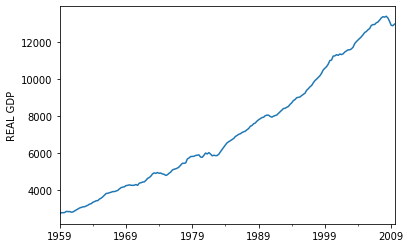

In [9]:
df['realgdp'].plot()
plt.ylabel("REAL GDP")

## Using Statsmodels to get the trend
The Hodrick-Prescott filter separates a time-series  y_t  into a trend  τ_t and a cyclical component  ζt

$y_t = \tau_t + \zeta_t$

The components are determined by minimizing the following quadratic loss function

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

In [10]:
# Tuple unpacking
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.realgdp)

In [11]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp, Length: 203, dtype: float64

In [12]:
type(gdp_cycle)

pandas.core.series.Series

In [13]:
df["trend"] = gdp_trend

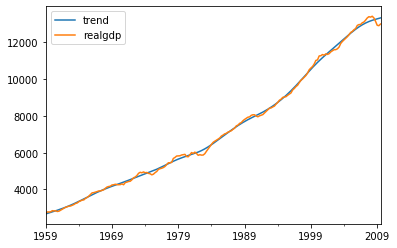

In [14]:
df[['trend','realgdp']].plot()

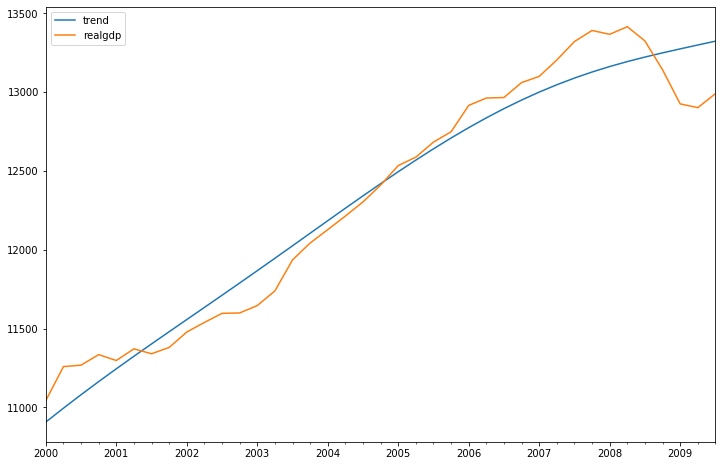

In [15]:
df[['trend','realgdp']]["2000-03-31":].plot(figsize=(12,8))

## Great job!